In [2]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import col as column

weights=[0.8,0.2]
seed=42

In [3]:
train_data_df=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Big Data/Datasets/Titanic/train.csv')
test_data_df=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Big Data/Datasets/Titanic/test.csv')

print train_data_df.count()
print '********************'
print test_data_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
********************
PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64


In [4]:
#We now examine the train data to clean it.

train_data_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# We will drop the Cabin names and the tickets since they wont be used.
train_data_df2=train_data_df.drop(['Ticket','Cabin','Name'],1)
test_data_df2=test_data_df.drop(['Ticket','Cabin','Name'],1)

In [6]:
train_data_df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [7]:
test_data_df2.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

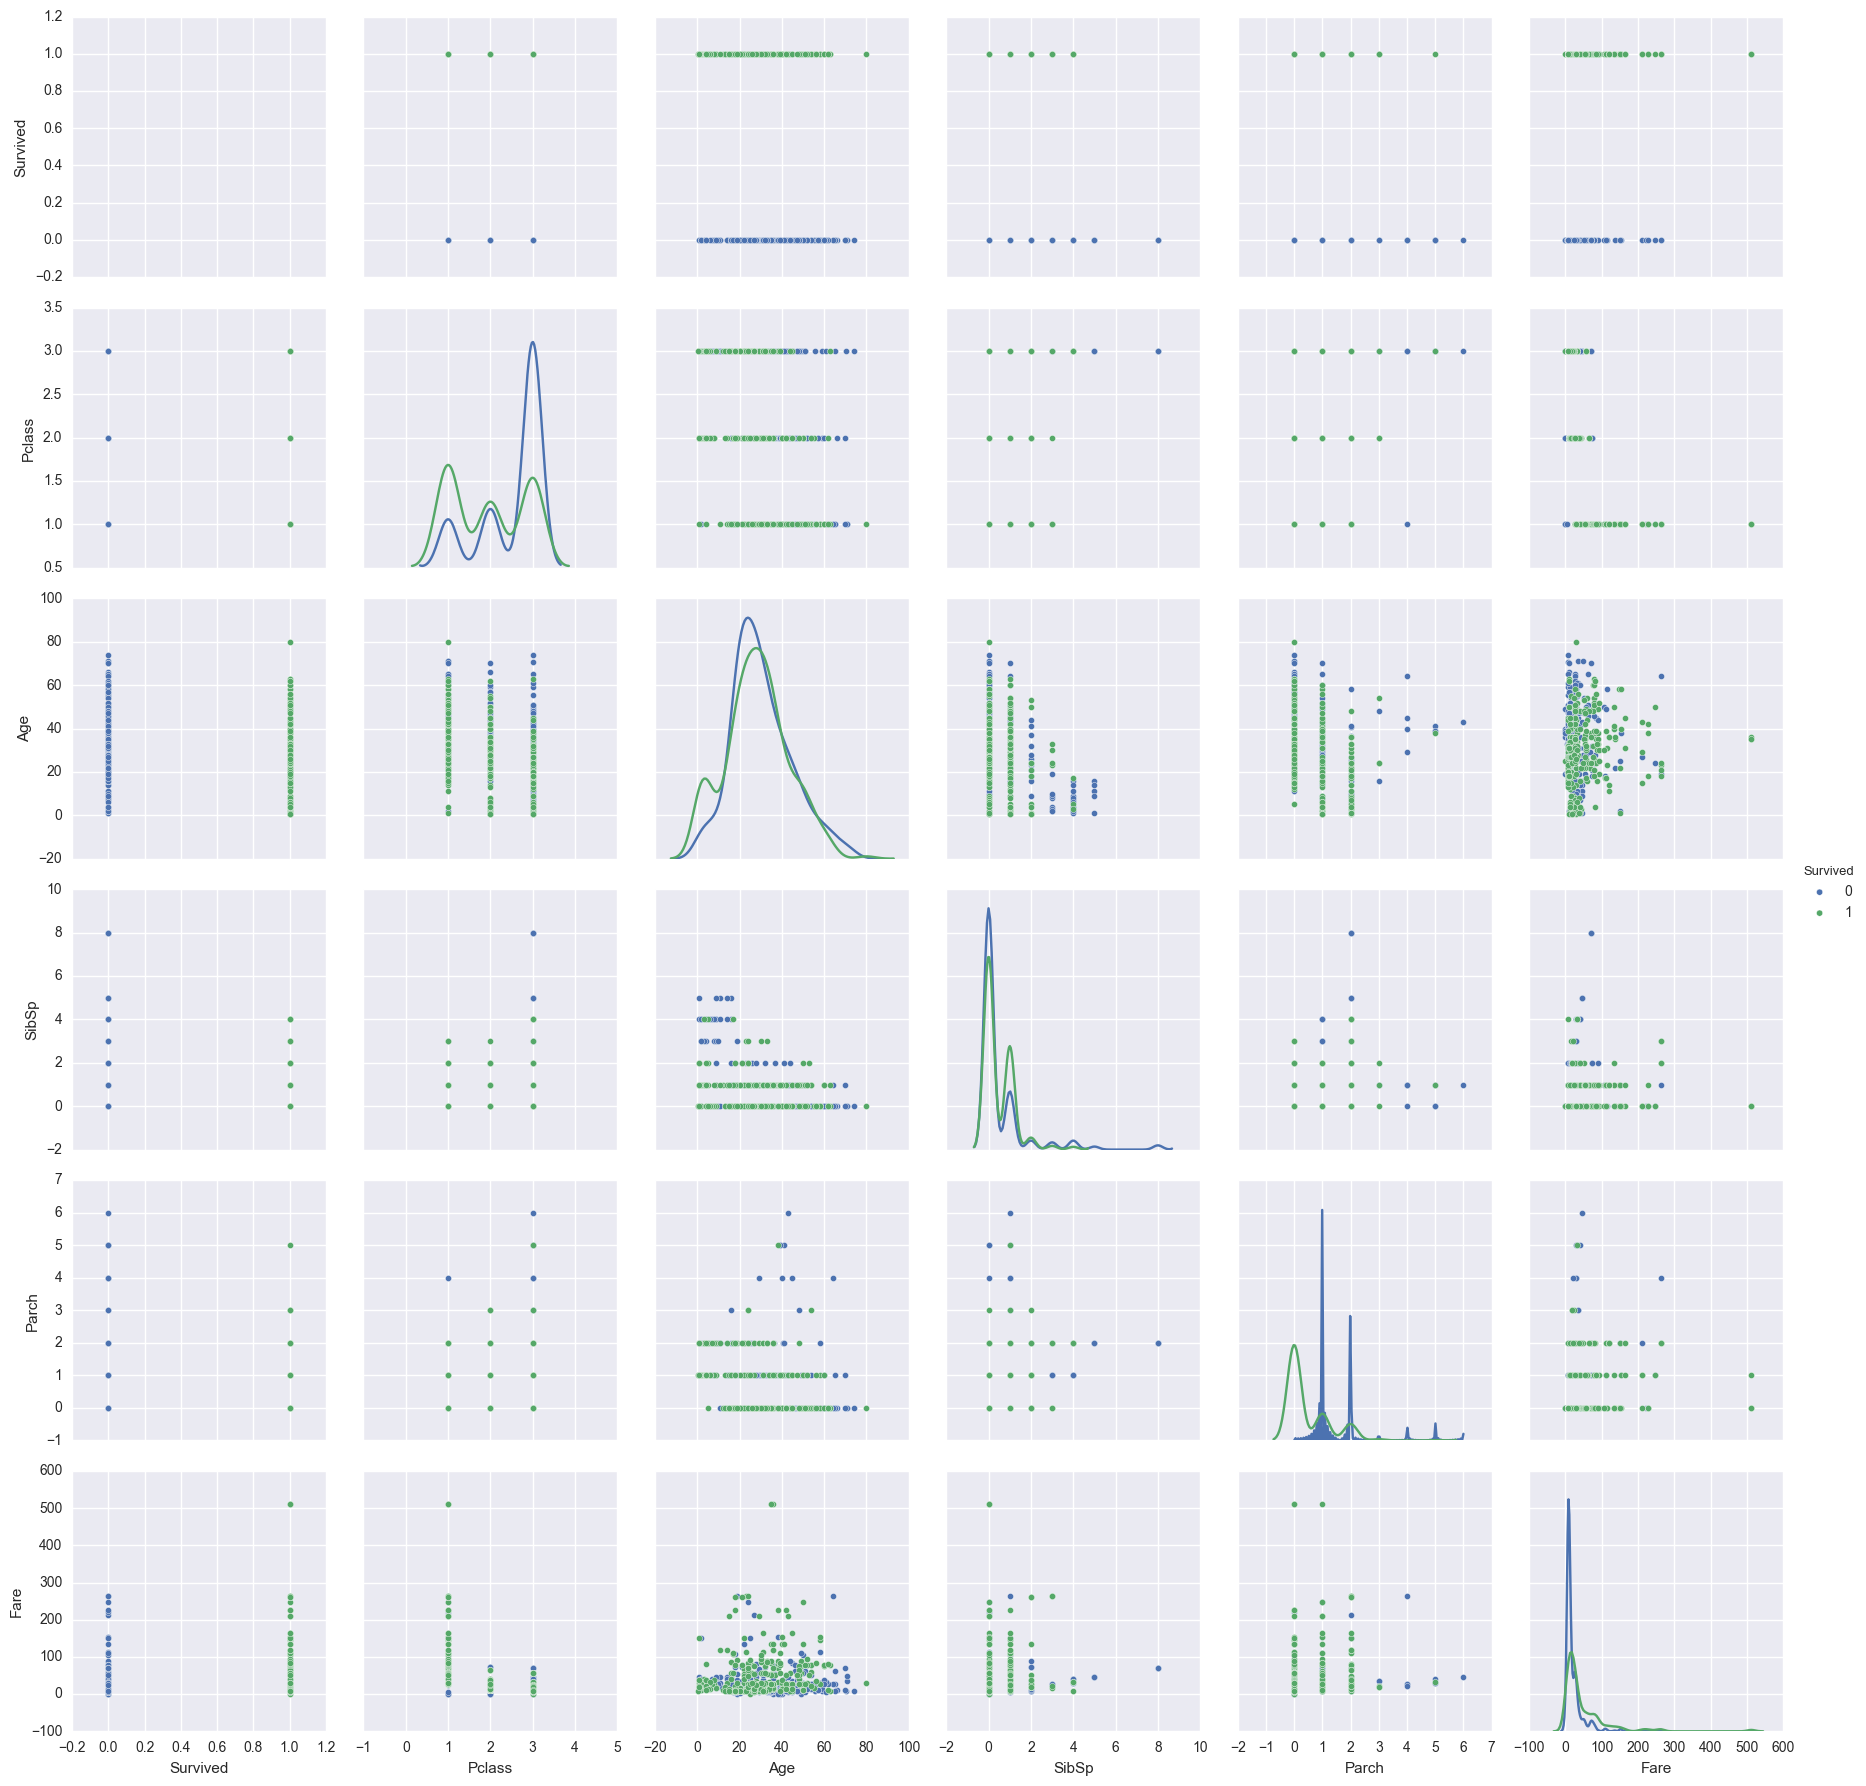

In [8]:
#Let's look at how each variable affects the probability of survival.

sns.pairplot(train_data_df2.drop('PassengerId',axis=1), hue="Survived", size=3, diag_kind="kde")

/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


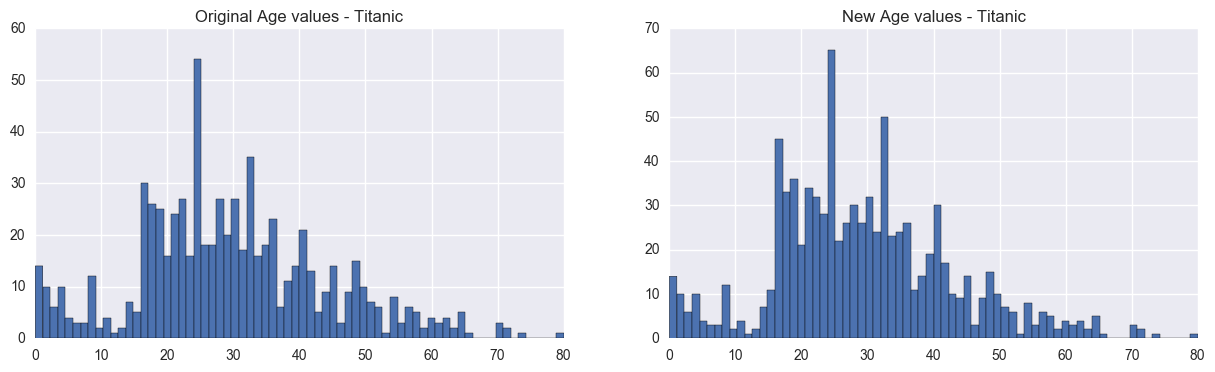

In [9]:
# We look at how the amount of survived varied based on individual features:Age,Sex,Parch,SibSp,Fare

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = train_data_df2["Age"].mean()
std_age_titanic       = train_data_df2["Age"].std()
count_nan_age_titanic = train_data_df2["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_data_df2["Age"].mean()
std_age_test       = test_data_df2["Age"].std()
count_nan_age_test = test_data_df2["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
train_data_df2['Age'].dropna().astype(int).hist(bins=70,ax=axis1)

# fill NaN values in Age column with random values generated
train_data_df2["Age"][np.isnan(train_data_df2["Age"])] = rand_1
test_data_df2["Age"][np.isnan(test_data_df2["Age"])] = rand_2

# convert from float to int
train_data_df2['Age'] = train_data_df2['Age'].astype(int)
test_data_df2['Age'] = test_data_df2['Age'].astype(int)
        
# plot new Age Values
train_data_df2['Age'].hist(bins=70,ax=axis2)

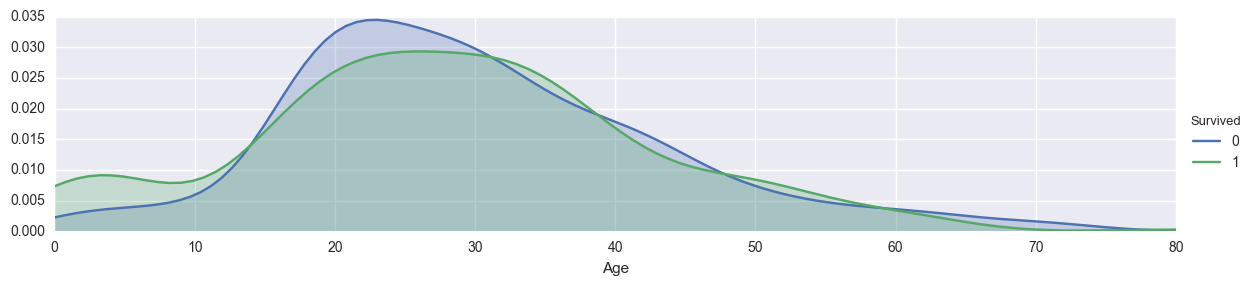

In [10]:
#Based on Age
facet = sns.FacetGrid(train_data_df2, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data_df2['Age'].max()))
facet.add_legend()

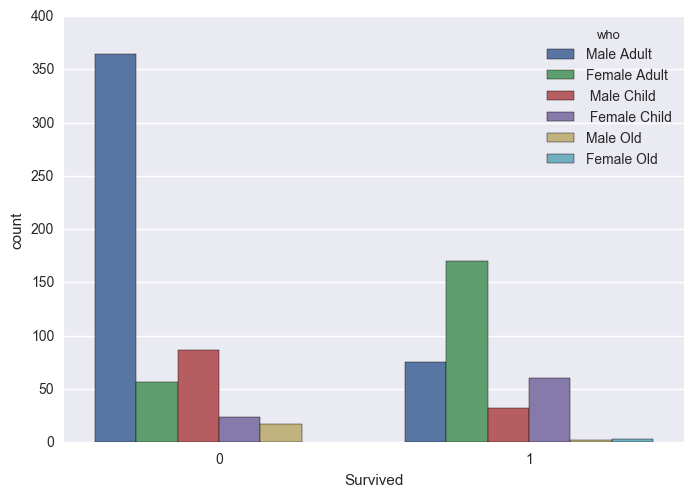

In [11]:
#We get the number of children, adults, old people who survived
def _who(x):
    if x['Sex']=='male':
        if x['Age']<=19.0:
            return ' Male Child'
        elif x['Age']<=60.0 and x['Age']>=20.0:
            return 'Male Adult'
        elif x['Age']>60.0:
            return 'Male Old'
    elif x['Sex']=='female':
        if x['Age']<=19.0:
            return ' Female Child'
        elif x['Age']<=60.0 and x['Age']>=20.0:
            return 'Female Adult'
        elif x['Age']>60.0:
            return 'Female Old'

train_data_df2['who']=train_data_df2.apply(lambda x:_who(x),axis=1)
test_data_df2['who']=test_data_df2.apply(lambda x:_who(x),axis=1)

#Now plotting the Survived and the type of people
plt.figure(2)
sns.countplot(x='Survived', hue="who", data=train_data_df2)

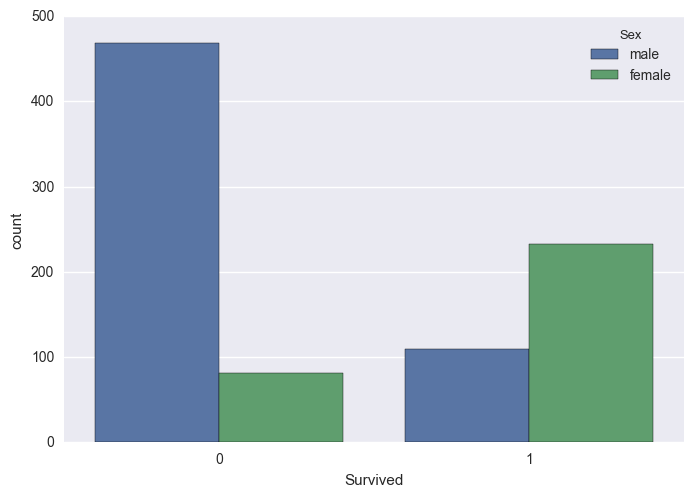

In [12]:
#Based on Sex. Females had a higher survival rate then males.
sns.countplot(x='Survived', hue="Sex", data=train_data_df2)

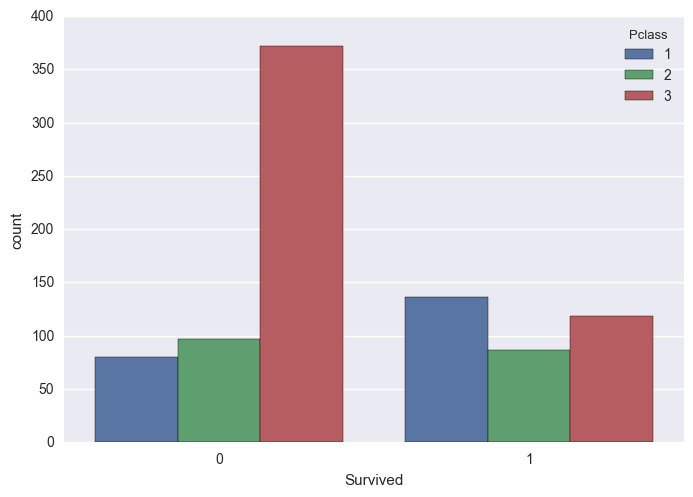

In [13]:
#Based on Passenger Class
sns.countplot(x='Survived', hue="Pclass", data=train_data_df2)

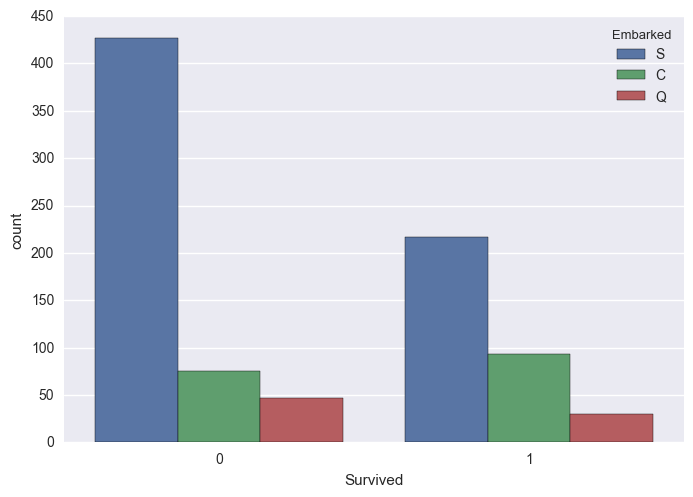

In [14]:
#Based on where did the passengers board the Titanic
sns.countplot(x='Survived', hue="Embarked", data=train_data_df2)

/Users/adityavyas/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


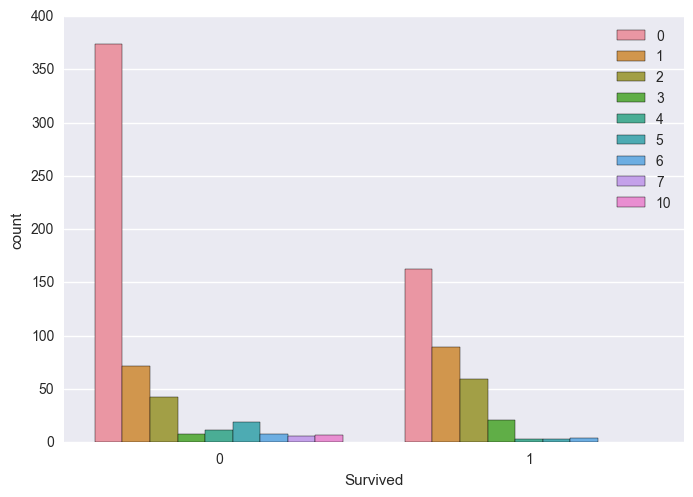

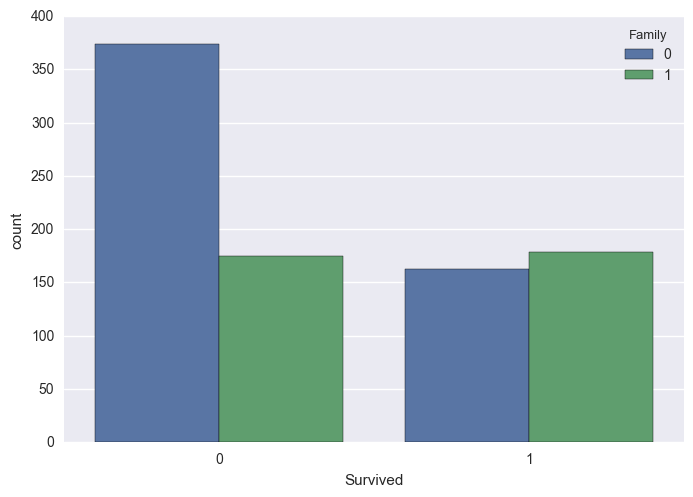

In [15]:
# We look at the family of the passengers. Thus we combine the Parch and SibSp values to know if having a family 
# member on was integral to survival of the person

train_data_df2['Family']=train_data_df2['Parch']+train_data_df2['SibSp']
test_data_df2['Family']=test_data_df2['Parch']+test_data_df2['SibSp']

train_data_df2.drop(['Parch','SibSp'],1)
test_data_df2.drop(['Parch','SibSp'],1)

plt.figure(1)
sns.countplot(x='Survived', hue="Family", data=train_data_df2)
plt.legend(loc='upper right')

#Thus people with no family had higher chances of survival than people with family.We can plot this in a simpler way
#by defining only 2 cases: Alone or With Family

#1:With Family, 0:Without Family
train_data_df2['Family'].loc[train_data_df2['Family']>0]=1
train_data_df2['Family'].loc[train_data_df2['Family']==0]=0

test_data_df2['Family'].loc[train_data_df2['Family']>0]=1
test_data_df2['Family'].loc[train_data_df2['Family']==0]=0

plt.figure(2)
sns.countplot(x='Survived', hue="Family", data=train_data_df2)

In [16]:
#We check finally before predicting if we have any NaN values left in the dataset

train_data_df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
who            0
Family         0
dtype: int64

In [17]:
test_data_df2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
who            0
Family         0
dtype: int64

In [18]:
train_data_df2["Embarked"][train_data_df2['Embarked']=='NaN'] = 'S'
test_data_df2['Fare'][test_data_df2['Embarked']=='NaN']=test_data_df2['Fare'].mean()

/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
train_data_df3=train_data_df2.drop(['Parch','SibSp','Sex'],1)
test_data_df3=test_data_df2.drop(['Parch','SibSp','Sex'],1)
train_data_df3.head(1)

,PassengerId,Survived,Pclass,Age,Fare,Embarked,who,Family
0,1,0,3,22,7.25,S,Male Adult,1


In [20]:
who_dummies_train=pd.get_dummies(train_data_df3['who'])
who_dummies_test=pd.get_dummies(test_data_df3['who'])

embark_dummies_train=pd.get_dummies(train_data_df3['Embarked'])
embark_dummies_test=pd.get_dummies(test_data_df3['Embarked'])

In [21]:
train_data_df4=train_data_df3.join(who_dummies_train).join(embark_dummies_train)
test_data_df4=test_data_df3.join(who_dummies_test).join(embark_dummies_test)

train_data_df5=train_data_df4.drop(['who','Embarked'],1)
test_data_df5=test_data_df4.drop(['who','Embarked'],1)

train_data_df5.head(5)

,PassengerId,Survived,Pclass,Age,Fare,Family,Female Child,Male Child,Female Adult,Female Old,Male Adult,Male Old,C,Q,S
0,1,0,3,22,7.2500,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1,1,38,71.2833,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,26,7.9250,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,35,53.1000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,35,8.0500,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
test_data_df5.head(2)

,PassengerId,Pclass,Age,Fare,Family,Female Child,Male Child,Female Adult,Female Old,Male Adult,Male Old,C,Q,S
0,892,3,34,7.8292,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,893,3,47,7.0000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
X_train=train_data_df5.drop('Survived',1)
Y_train=train_data_df5['Survived']
X_test=test_data_df5

In [80]:
test_data_df5['Fare'].fillna(test_data_df['Fare'].mean(),inplace=True)

In [81]:
from sklearn import linear_model

log_reg=linear_model.LogisticRegression(fit_intercept=True,solver='lbfgs')
log_reg.fit(X_train,Y_train)
Y_pred=log_reg.predict(X_test)
log_reg.score(X_train,Y_train)

ValueError: X has 15 features per sample; expecting 14

In [26]:
from sklearn import svm

sv=svm.SVC(C=1.0,kernel='rbf')
sv.fit(X_train,Y_train)
sv.predict(X_test)
sv.score(X_train,Y_train)

0.9932659932659933

In [78]:
#However we will use cross_validation to test the accuracy of our model

from sklearn.cross_validation import train_test_split

train1_df,val1_df=train_test_split(train_data_df5,train_size=0.8)
print train1_df.count()
print '------------------------'
print val1_df.count()

PassengerId      712
Survived         712
Pclass           712
Age              712
Fare             712
Family           712
 Female Child    712
 Male Child      712
Female Adult     712
Female Old       712
Male Adult       712
Male Old         712
C                712
Q                712
S                712
dtype: int64
------------------------
PassengerId      179
Survived         179
Pclass           179
Age              179
Fare             179
Family           179
 Female Child    179
 Male Child      179
Female Adult     179
Female Old       179
Male Adult       179
Male Old         179
C                179
Q                179
S                179
dtype: int64


In [76]:
#Now we use the validation set for determining accuracy and not the training set.

x_train1=train1_df.drop('Survived',1)
y_train1=train1_df['Survived']

x_val1=val1_df.drop('Survived',1)
y_val1=val1_df['Survived']

In [29]:
# Simple Logistic Regression

log_reg.fit(x_train1,y_train1)
y_pred1=log_reg.predict(x_val1)
log_reg.score(x_val1,y_val1)

0.76536312849162014

In [67]:
#Support Vector Machine

sv1=svm.SVC(C=100.0,kernel='rbf')
sv1.fit(x_train1,y_train1)
y_pred2=sv1.predict(x_val1)
sv1.score(x_val1,y_val1)

0.56983240223463683

In [74]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train1,y_train1)
Y_pred = random_forest.predict(x_val1)
random_forest.score(x_val1,y_val1)

0.82122905027932958

In [77]:
random_forest.fit(X_train,Y_train)
final_prediction=random_forest.predict(X_test)
final_prediction

ValueError: Number of features of the model must  match the input. Model n_features is 14 and  input n_features is 15 

In [33]:
test_data_df5['Survived']=final_prediction

In [34]:
test_data_df5.head(100)

,PassengerId,Pclass,Age,Fare,Family,Female Child,Male Child,Female Adult,Female Old,Male Adult,Male Old,C,Q,S,Survived
0,892,3,34,7.8292,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,893,3,47,7.0000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,894,2,62,9.6875,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,895,3,27,8.6625,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,896,3,22,12.2875,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,897,3,14,9.2250,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,898,3,30,7.6292,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
7,899,2,26,29.0000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
8,900,3,18,7.2292,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
9,901,3,21,24.1500,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [44]:
# We will see if dividing the Pclass variables into categorical variable helps or not.

pclass_dummies_train=pd.get_dummies(train_data_df5['Pclass'])
pclass_dummies_test=pd.get_dummies(test_data_df5['Pclass'])

train_df6=train_data_df5.join(pclass_dummies_train)
test_df6=test_data_df5.join(pclass_dummies_test)

train_df7=train_df6.drop('Pclass',1)
test_df7=test_df6.drop('Pclass',1)

In [45]:
train2_df,val2_df=train_test_split(train_df7,train_size=0.8)

In [46]:
#Now we use the validation set for determining accuracy and not the training set.

x_train2=train2_df.drop('Survived',1)
y_train2=train2_df['Survived']

x_val2=val2_df.drop('Survived',1)
y_val2=val2_df['Survived']

In [47]:
# Simple Logistic Regression

log_reg.fit(x_train2,y_train2)
y_pred1=log_reg.predict(x_val2)
log_reg.score(x_val2,y_val2)

0.75418994413407825

In [48]:
#Support Vector Machine

sv1=svm.SVC(C=100.0,kernel='rbf')
sv1.fit(x_train2,y_train2)
y_pred2=sv1.predict(x_val2)
sv1.score(x_val2,y_val2)

0.60893854748603349

In [73]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
random_forest1 = RandomForestClassifier(n_estimators=100)
random_forest1.fit(x_train2,y_train2)
Y_pred = random_forest1.predict(x_val2)
random_forest1.score(x_val2,y_val2)

0.78212290502793291

In [ ]:
#Hence our best model was random forest when Pclass was not divided into categorical values.